In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('./data/avocado.csv', index_col=0)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [4]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
df.groupby('type').mean()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,
conventional,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [6]:
df = df.loc[(df.type == 'conventional') & (df.region == 'TotalUS')]
df['Date'] = pd.to_datetime(df['Date'])
data = df[['Date','AveragePrice']].reset_index(drop=True)
data = data.rename(columns = {'Date':'ds', 'AveragePrice':'y'})
data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


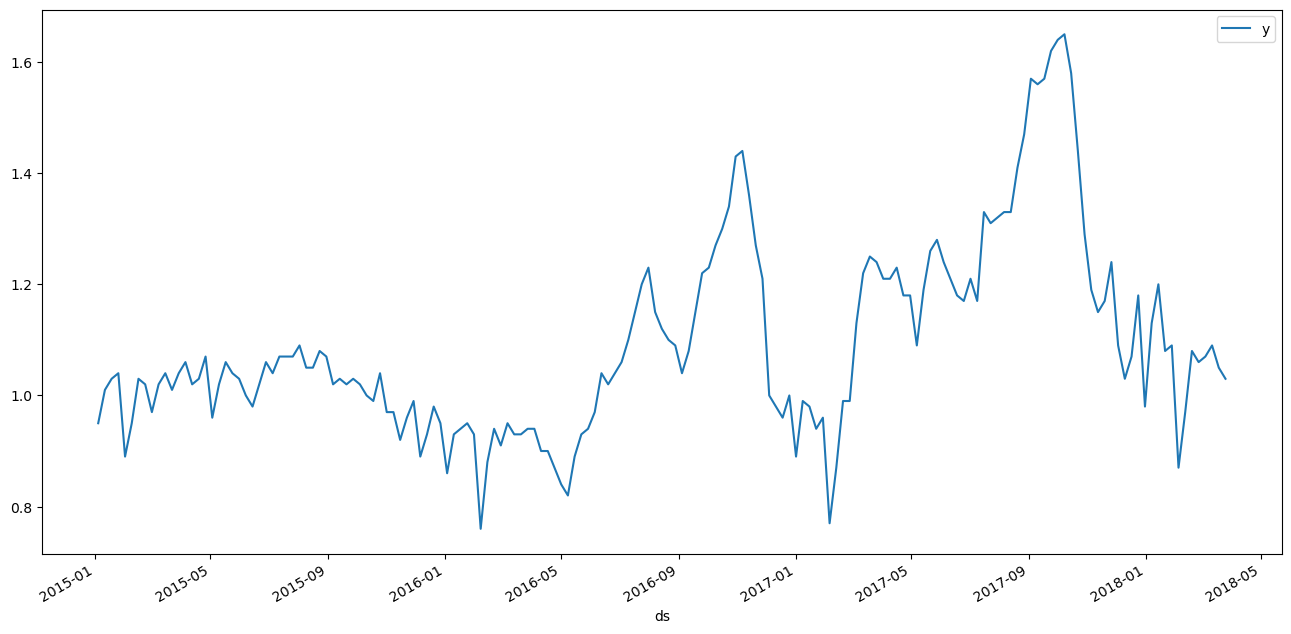

In [7]:
data.plot(x='ds',y='y',figsize=(16,8))

In [8]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.171972,0.973803,1.239465,1.113284,1.242560,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,0.0,0.0,0.0,1.112634
530,2019-03-22,1.171861,0.979335,1.245924,1.112881,1.242822,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,0.0,0.0,0.0,1.113933
531,2019-03-23,1.171750,0.980109,1.242947,1.112388,1.243116,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,0.0,0.0,0.0,1.115706
532,2019-03-24,1.171640,0.982281,1.258014,1.111901,1.243378,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,0.0,0.0,0.0,1.117936
533,2019-03-25,1.171529,0.992744,1.260745,1.111441,1.243678,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,0.0,0.0,0.0,1.120593


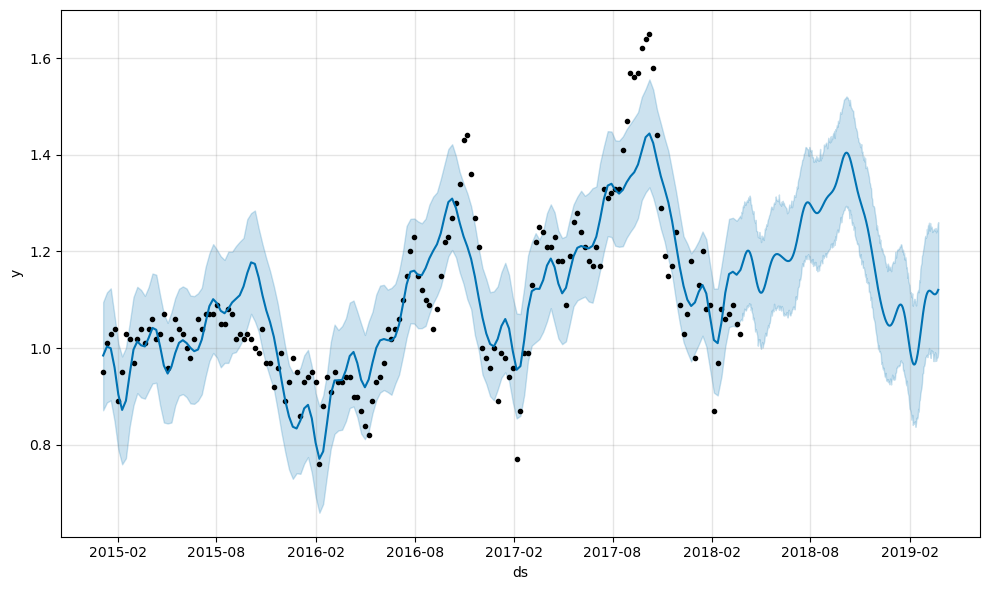

In [9]:
fig1 = model.plot(forecast)

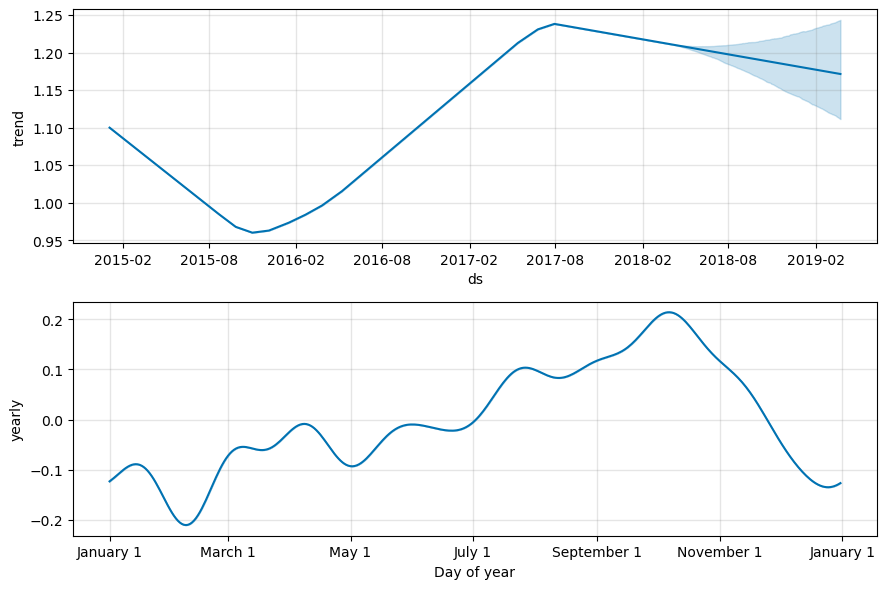

In [10]:
fig2 = model.plot_components(forecast)

In [11]:
pip install -U finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [12]:
import FinanceDataReader as fdr

In [13]:
fdr.__version__

'0.9.42'

In [14]:
import matplotlib.pyplot as plt
df = fdr.DataReader('005930','2017-01-01')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2022-10-07,55900,56900,55200,56200,16886813,-0.001776
2022-10-11,54400,55700,54000,55400,21437877,-0.014235
2022-10-12,55700,57000,55200,55800,18408910,0.007220


In [15]:
df['Date'] = pd.to_datetime(df.index)

In [16]:
data = df[['Date','Close']].reset_index(drop=True)
data = data.rename(columns = {'Date':'ds', 'Close':'y'})
data.tail()

,ds,y
1416,2022-10-07,56200
1417,2022-10-11,55400
1418,2022-10-12,55800
1419,2022-10-13,55200
1420,2022-10-14,56300


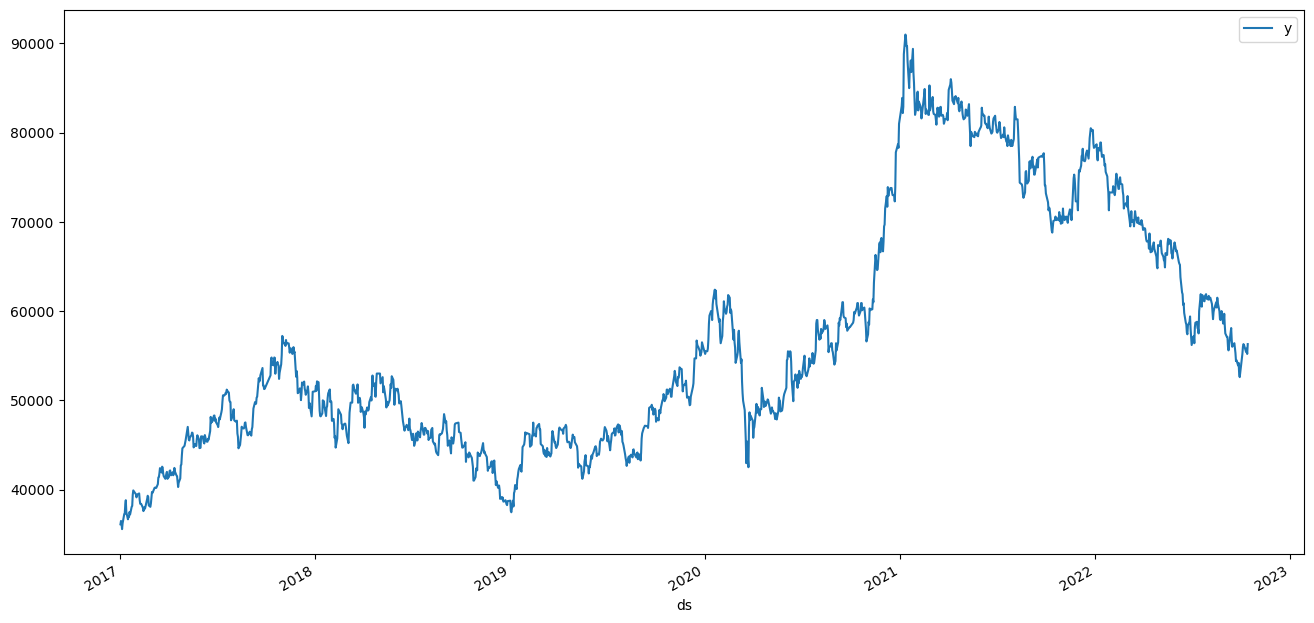

In [17]:
data.plot(x='ds',y='y',figsize=(16,8))

In [18]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1781,2023-10-10,40202.204321,18763.870749,55779.838116,21813.864732,59252.319818,-3032.750566,-3032.750566,-3032.750566,-449.991110,-449.991110,-449.991110,-2582.759456,-2582.759456,-2582.759456,0.0,0.0,0.0,37169.453754
1782,2023-10-11,40151.779110,18202.743165,55659.257169,21687.501139,59313.749315,-3140.160569,-3140.160569,-3140.160569,-524.964259,-524.964259,-524.964259,-2615.196310,-2615.196310,-2615.196310,0.0,0.0,0.0,37011.618541
1783,2023-10-12,40101.353900,18780.838365,56050.839895,21585.092227,59347.646895,-3161.385081,-3161.385081,-3161.385081,-520.049203,-520.049203,-520.049203,-2641.335878,-2641.335878,-2641.335878,0.0,0.0,0.0,36939.968819
1784,2023-10-13,40050.928689,17774.994956,54922.862595,21488.279366,59381.544474,-3244.505356,-3244.505356,-3244.505356,-583.673170,-583.673170,-583.673170,-2660.832186,-2660.832186,-2660.832186,0.0,0.0,0.0,36806.423333
1785,2023-10-14,40000.503479,20029.876944,57675.702959,21409.575411,59413.108435,-1350.351805,-1350.351805,-1350.351805,1323.097748,1323.097748,1323.097748,-2673.449553,-2673.449553,-2673.449553,0.0,0.0,0.0,38650.151673


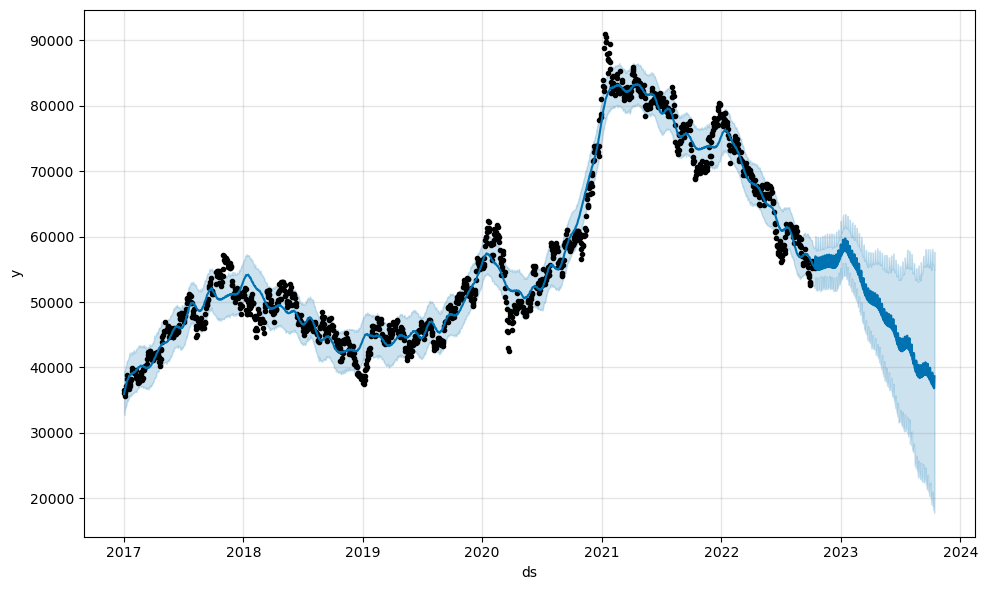

In [19]:
fig1 = model.plot(forecast)

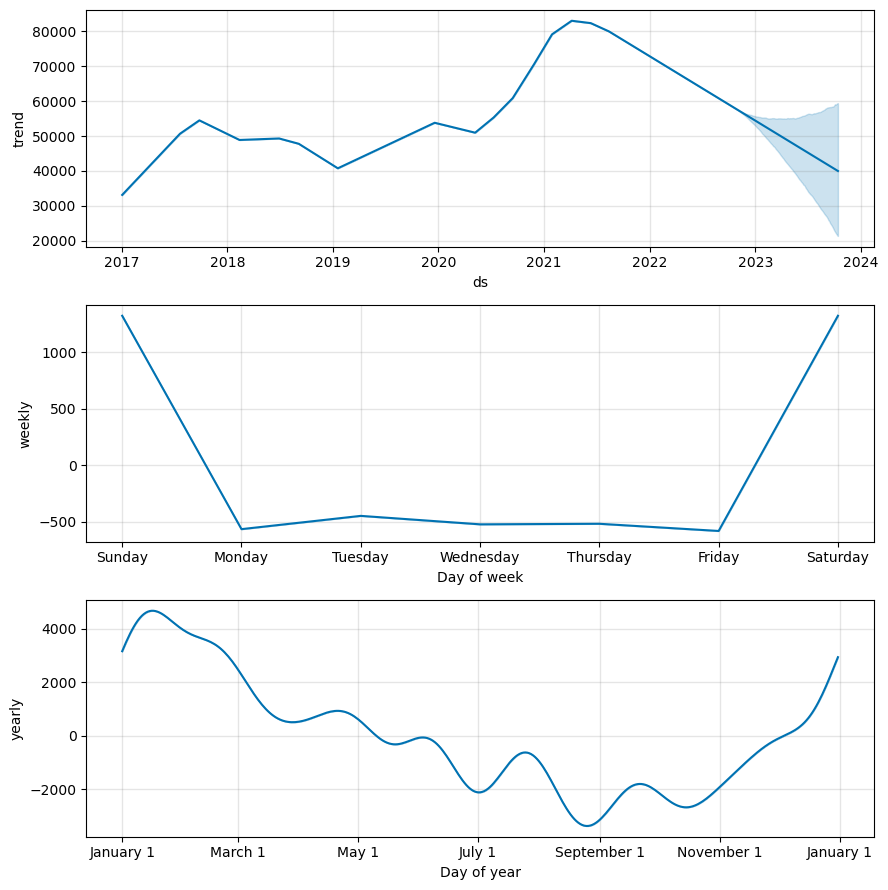

In [20]:
fig2 = model.plot_components(forecast)